In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

# Load the data
file_path = 'genelab_osd.txt'
data = pd.read_csv(file_path, delimiter='\t')

# Minor error/formatting corrections to data
data['technologyType'] = data['technologyType'].replace('single-cell RNA Sequencing', 'single-cell RNA sequencing')

data['technologyType'] = data['technologyType'].replace('DNA microarray', 'microarray')

# Helper function to sort measures into omics categories
def assign_category(measurement_type):
    categories = {
        'genomics': ["genome sequencing", "copy number variation profiling",
                         "deletion pool profiling", "Amplicon Sequencing",
                         "Genome-wide Association Study"],
            'transcriptomics': ["transcription profiling", "RNA methylation profiling"],
            'proteomics': ["protein expression profiling", "protein quantification",
                           "phosphoprotein profiling", "protein-DNA binding site identification",
                           "protein identification"],
            'metabolomics': ["metabolite profiling"],
            'epigenomics': ["DNA methylation profiling", "Chromatin Accessibility"],
            'metagenomics': ["metagenome profiling",
                                                          "Metagenomic sequencing",
                                                          "environmental gene survey"],
            'non-omics': ["Molecular Cellular Imaging", "Behavior", "Bone Microstructure",
                          "Echocardiogram", "Histological Assay", "Image Analysis",
                          "Morphometric analysis", "Bone biomechanical measurement",
                          "Calcium Uptake", "histology", "Intraocular Pressure", "Flow Cytometry"]
        }

    for category, measurements in categories.items():
        if measurement_type in measurements:
            return category

    return "Uncategorized"

# Assign an omics type to each row based on measurementType
data['Category'] = data['measurementType'].apply(assign_category)

# category counts
print(data['Category'].value_counts())


Category
transcriptomics    350
genomics            48
non-omics           42
proteomics          38
metagenomics        29
epigenomics         29
metabolomics         9
Name: count, dtype: int64


Table of omics counts:
Category
transcriptomics    350
genomics            48
proteomics          38
metagenomics        29
epigenomics         29
metabolomics         9
Name: count, dtype: int64


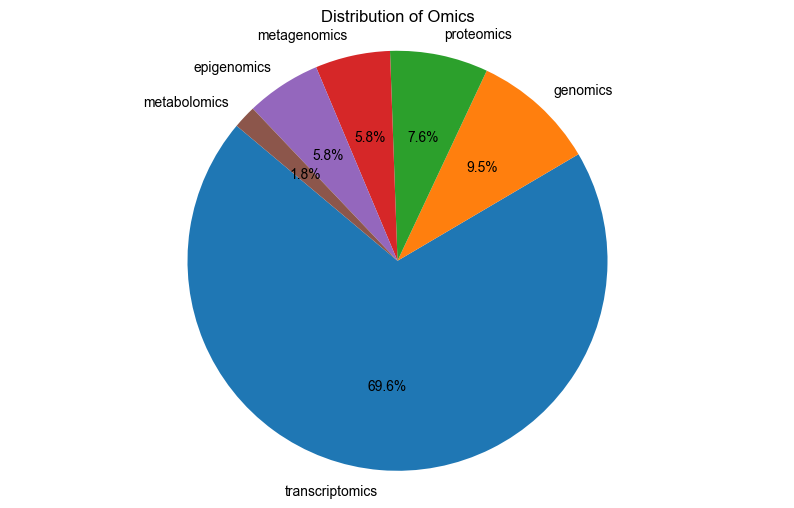

In [25]:
# Drop non-omics rows
indices_to_drop = data[data['Category'] == 'non-omics'].index
omics_data = data.drop(indices_to_drop)

omics_category_counts = omics_data['Category'].value_counts()

# table of unique omics and their counts
print("Table of omics counts:")
print(omics_category_counts)

#  plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(omics_category_counts, labels=omics_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Omics')
plt.show()

Table of unique values in the 'technologyType' column for 'transcription profiling' measurementType:
technologyType
microarray                    164
RNA Sequencing (RNA-Seq)      152
nucleotide sequencing           6
spatial transcriptomics         6
real time PCR                   6
single-cell RNA sequencing      6
miRNA Sequencing                5
Name: count, dtype: int64


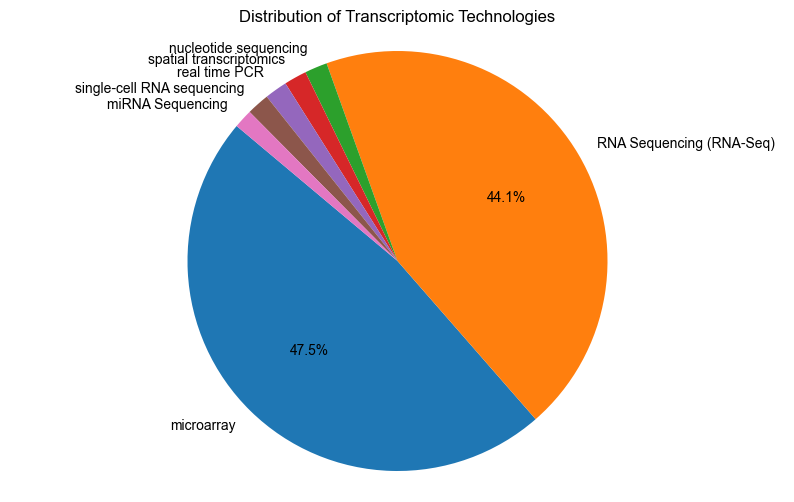

In [26]:
# helper function to only display percentages >= 3%
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct >= 3 else ''

# Filter  data to 'transcription profiling' only
filtered_data = data[data['measurementType'] == 'transcription profiling']

# count occurrences of each unique transcriptomics technology
technology_counts = filtered_data['technologyType'].value_counts()

# Print a table of counts for transcriptomic techs
print("Table of unique values in the 'technologyType' column for 'transcription profiling' measurementType:")
print(technology_counts)

# plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(technology_counts, labels=technology_counts.index, autopct=custom_autopct, startangle=140)
plt.axis('equal') 
plt.title('Distribution of Transcriptomic Technologies')
plt.show()


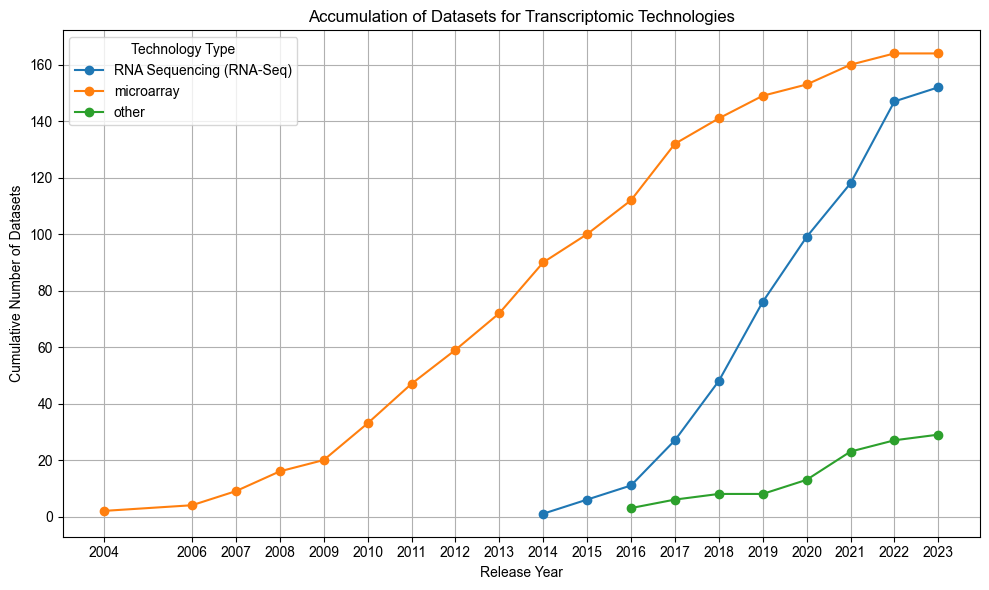

In [27]:
# Group non microarray and rna-seq technologies into 'other'
for index, row in filtered_data.iterrows():
    if row['technologyType'] == 'microarray':
        pass
    elif row['technologyType'] == 'RNA Sequencing (RNA-Seq)':
        pass
    else:
        filtered_data.at[index, 'technologyType'] = 'other'

# Group by publicReleaseDateYear and technologyType, then count the number of records in each group
grouped_data = filtered_data.groupby(['publicReleaseDateYear', 'technologyType']).size().unstack(fill_value=0)

# cumulative sum over the years and replace zeros with NaN
cumulative_data = grouped_data.cumsum().replace(0, np.nan)

# line graph of cumulative counts
cumulative_data.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Accumulation of Datasets for Transcriptomic Technologies')
plt.xlabel('Release Year')
plt.ylabel('Cumulative Number of Datasets')
plt.xticks(cumulative_data.index)
plt.legend(title='Technology Type')
plt.grid(True)
plt.tight_layout()
plt.show()


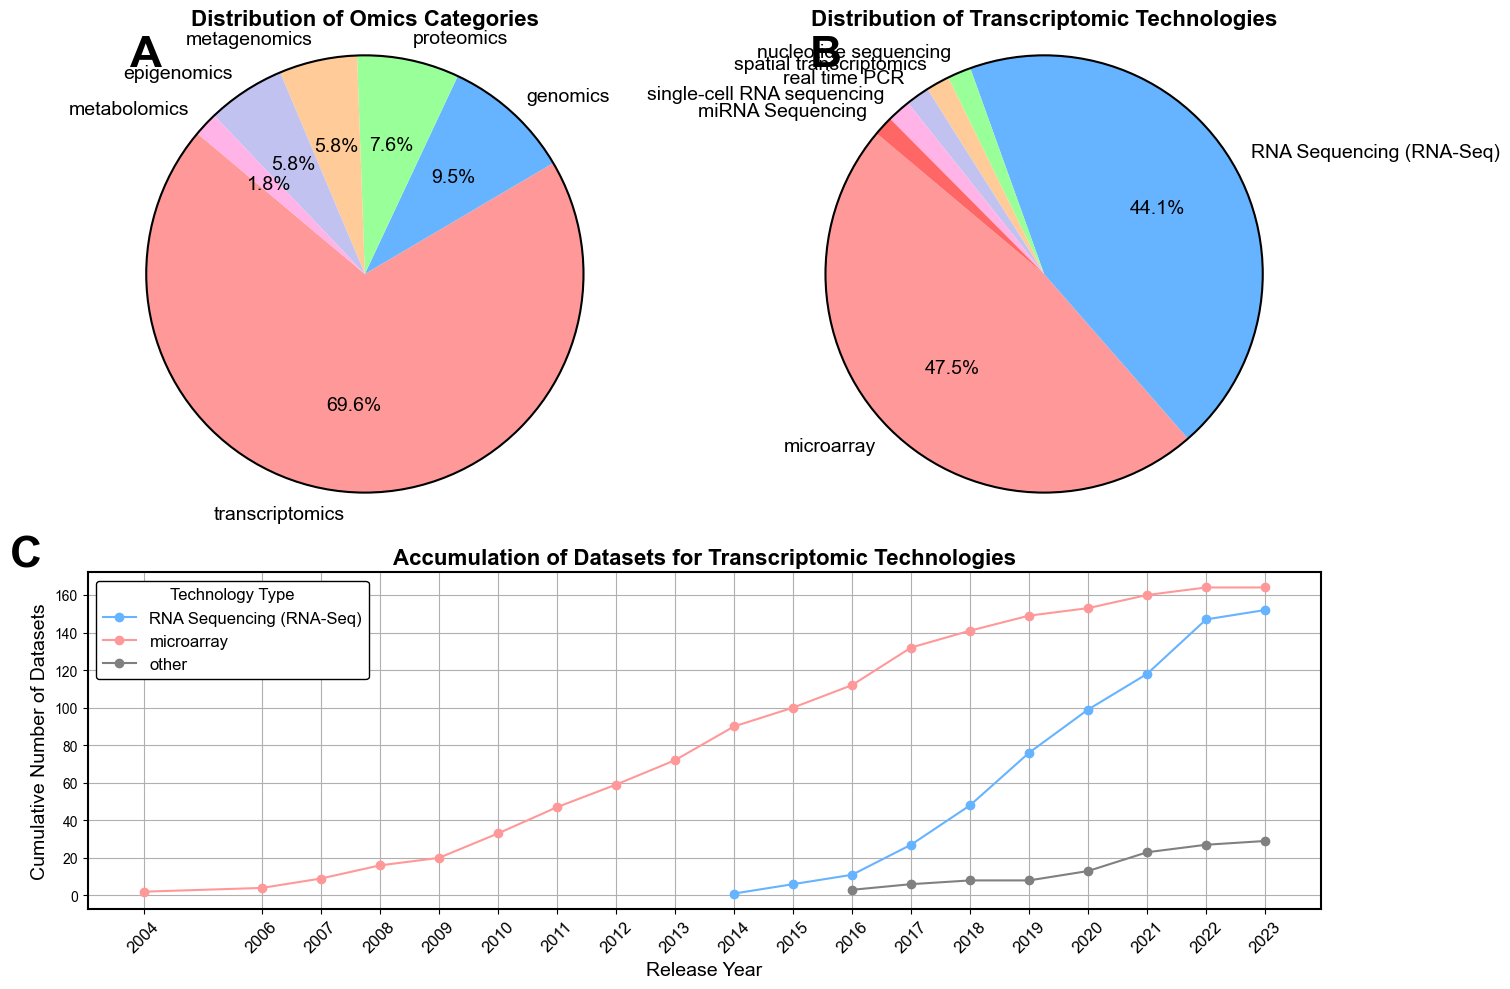

In [28]:
####### WHOLE FIGURE #####

# font
plt.rcParams['font.family'] = 'Arial'
textprops = {"fontsize": 14, "fontname": "Arial"}

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.7])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6', '#ff6666', '#c2f0c2']

def draw_circle(ax, position, radius, **kwargs):
    circle = patches.Circle(position, radius, clip_on=False, edgecolor='black', facecolor='none', **kwargs)
    ax.add_artist(circle)

# Panel A: Distribution of omics pie chart
ax0 = plt.subplot(gs[0, 0])
ax0.pie(omics_category_counts, labels=omics_category_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops=textprops)
ax0.axis('equal')
draw_circle(ax0, position=(0, 0), radius=1, linewidth=1.5)
ax0.set_title('Distribution of Omics Categories', fontsize=16, fontweight='bold')
ax0.text(-1, 1, 'A', horizontalalignment='center', verticalalignment='center', fontsize=32, fontweight='bold')

# Panel B: Distribution of transcriptomic tech pie chart
ax1 = plt.subplot(gs[0, 1])
ax1.pie(technology_counts, labels=technology_counts.index, autopct=custom_autopct, startangle=140, colors=colors, textprops=textprops)
ax1.axis('equal')
draw_circle(ax1, position=(0, 0), radius=1, linewidth=1.5)
ax1.set_title('Distribution of Transcriptomic Technologies', fontsize=16, fontweight='bold')
ax1.text(-1, 1, 'B', horizontalalignment='center', verticalalignment='center', fontsize=32, fontweight='bold')

# Panel C: Line chart transcriptomics tech
ax2 = plt.subplot(gs[1, :])
cumulative_data.plot(kind='line', marker='o', ax=ax2, color=['#66b3ff', '#ff9999','gray'])
ax2.set_title('Accumulation of Datasets for Transcriptomic Technologies', fontsize=16, fontweight='bold')
ax2.set_xlabel('Release Year', fontsize=14)
ax2.set_ylabel('Cumulative Number of Datasets', fontsize=14)

# thickness of axis
for spine in ax2.spines.values():
    spine.set_linewidth(1.5)

# legend
legend = ax2.legend(title='Technology Type', fontsize=12, title_fontsize='large')
frame = legend.get_frame()
frame.set_edgecolor('black')
frame.set_facecolor('white')
frame.set_alpha(1)

ax2.grid(True)

# x-axis ticks
unique_years = cumulative_data.index.unique()
ax2.set_xticks(unique_years)
ax2.set_xticklabels(unique_years, rotation=45, fontsize=12)

ax2.text(-0.05, 1.05, 'C', transform=ax2.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=32, fontweight='bold')


# Plot all and save .svg
plt.tight_layout()
plt.savefig("transcriptomic_trends.svg", format='svg')
plt.show()
